# Assignment -2

#### Author: Vikramaditya Agarwala

In [1]:
import praw
from praw.models import MoreComments
from collections import deque, defaultdict
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# creating instance of reddit class

reddit = praw.Reddit(
    client_id="Y6EqUxKVqV8xGN-wPS7Kbg",
    client_secret="bruMy9XSzxY-Lwjkcbu6RT_bdyyDrA",
    user_agent="Crawler first instance",
)

In [9]:
# creating output text files
subreddits = ['UIUC', 'fightingillini']

# Output file - Task 1
output_file = "Task1_result.txt"
outfile = open(output_file, 'w', encoding='utf-8')

# Output file - Task 2
output_file_2 = "Task2_result.txt"
outfile2 = open(output_file_2, 'w', encoding='utf-8')

## Task-1

In [10]:
for sub in subreddits:
    subreddit = reddit.subreddit(sub)
    hot_posts, new_posts, rising_posts = {'Title':[]}, {'Title':[]}, {'Title':[]} #loading all data in dictionary
    
    # TOP 10 posts sorted by HOT 
    count = 1
    print(f'\n{sub}\n', file = outfile)
    print("HOT POSTS" , file = outfile)
    for post in subreddit.hot(limit=10):
        print(count, post.title, file = outfile)
        hot_posts['Title'].append(post.title)
        count += 1

    # TOP 10 posts sorted by NEW
    count = 1
    print("\nNEW POSTS" , file = outfile)
    for post in subreddit.new(limit=10):
        print(count, post.title, file = outfile)
        new_posts['Title'].append(post.title)
        count += 1

    # TOP 10 posts sorted by RISING
    count = 1
    print("\nRISING POSTS", file = outfile)
    for post in subreddit.rising(limit=10):
        print(count, post.title, file = outfile)
        rising_posts['Title'].append(post.title)
        count += 1
        
# Output file name - Task1_output.txt

## Task-2

In [11]:
G = nx.DiGraph()

posts = ['sh7de5', 'wcsblz']
hierarchical_comments = []

print('------------------', file = outfile2)
print(f'\n sh7de5 \n', file = outfile2)
print('------------------', file = outfile2)
submission2 = reddit.submission('sh7de5')
submission2.comments.replace_more(limit=None)
for primary_comment in submission2.comments:
    G.add_edges_from([(primary_comment.id, submission2.id)])
    hierarchical_comments.append((primary_comment.id, submission2.id)) # loading comments relations in list
comment_queue = deque(submission2.comments[:])  # Seed with top-level
while comment_queue:
    comment = comment_queue.popleft()
    if not comment.replies:
        continue
    else:
        for inner_comment in comment.replies:
            G.add_edges_from([(inner_comment.id, comment.id)])
            hierarchical_comments.append((inner_comment.id, comment.id))
        comment_queue.extendleft(comment.replies)

    print(comment.body, file = outfile2)
    
print('\n\n\n\n', file = outfile2)
print("Hierarchical Comments: \n", file = outfile2)
print(hierarchical_comments, file = outfile2)
        

degree_g = sorted(G.degree(), key=lambda x: -x[1])
degree_g = degree_g[1][0]

# Output file name - Task2_output.txt

In [12]:
H = nx.DiGraph()
hierarchical_comments_h = []

print('------------------', file = outfile2)
print(f'\n wcsblz \n', file = outfile2)
print('------------------', file = outfile2)

submission3 = reddit.submission('wcsblz')
submission3.comments.replace_more(limit=None)

for primary_comment in submission3.comments:
    H.add_edges_from([(primary_comment.id, submission3.id)])
    hierarchical_comments_h.append((primary_comment.id, submission2.id)) # loading comments relations in list
    
comment_queue = deque(submission3.comments[:])  # Seed with top-level
while comment_queue:
    comment = comment_queue.popleft()
    if not comment.replies:
        continue
    else:
        for inner_comment in comment.replies:
            H.add_edges_from([(inner_comment.id, comment.id)])
            hierarchical_comments_h.append((inner_comment.id, comment.id))
        comment_queue.extendleft(comment.replies)
        
    print(comment.body, file = outfile2)
    
print('\n\n\n\n', file = outfile2)
print("Hierarchical Comments: \n", file = outfile2)
print(hierarchical_comments_h, file = outfile2)
        

degree = sorted(H.degree(), key=lambda x: -x[1])
degree_h = degree[1][0]

# Output file name - Task2_output.txt

In [16]:
outfile.close()
outfile2.close()

## Task-3

Order of the graph: 97
Size of the graph: 96
diameter: 22
Comment node with highest degree of the graph: ('hv0tdlz', 'These youngsters are taking "Squid Game" a bit too far...')


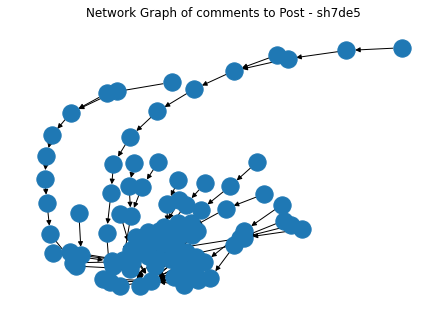

In [22]:
# Create a layout for nodes 
layout = nx.spring_layout(G,iterations=50,scale=2)

# Visualizing the graph
nx.draw(G)

# Printing required properties
print(f"Order of the graph: {G.order()}")
print(f"Size of the graph: {G.size()}")
diameter = nx.diameter(G.to_undirected())
print(f"diameter: {diameter}")
print(f"Comment node with highest degree of the graph: {degree_g, reddit.comment(degree_g).body}")
plt.axis('off')
plt.title("Network Graph of comments to Post - sh7de5")
plt.savefig("Comment_Network_sh7de5", bbox_inches='tight',pad_inches=0.5)
plt.show()

Order of the graph: 38
Size of the graph: 37
diameter: 9
Comment node with highest degree of the graph: ('iiep779', 'Honestly it should be a soybean')


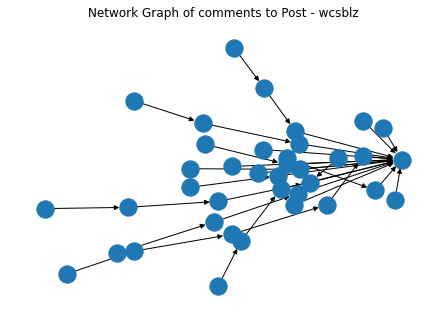

In [20]:
# Create a layout for nodes 
layout = nx.spring_layout(H,iterations=50,scale=2)

# Visualising the graph
nx.draw(H)

# Printing required properties
print(f"Order of the graph: {H.order()}")
print(f"Size of the graph: {H.size()}")
diameter = nx.diameter(H.to_undirected())
print(f"diameter: {diameter}")
print(f"Comment node with highest degree of the graph: {degree_h, reddit.comment(degree_h).body}")
plt.axis('off')
plt.title("Network Graph of comments to Post - wcsblz")
plt.savefig("Comment_network_wcsblz", bbox_inches='tight',pad_inches=0.5)
plt.show()

In [21]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/Users/welcome/opt/anaconda3/bin/python
3.9.7 (default, Sep 16 2021, 08:50:36) 
[Clang 10.0.0 ]
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)
